Dataset Shape: (1303, 12)

First 5 Rows:
   Unnamed: 0 Company   TypeName Inches                    ScreenResolution  \
0         0.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   
1         1.0   Apple  Ultrabook   13.3                            1440x900   
2         2.0      HP   Notebook   15.6                   Full HD 1920x1080   
3         3.0   Apple  Ultrabook   15.4  IPS Panel Retina Display 2880x1800   
4         4.0   Apple  Ultrabook   13.3  IPS Panel Retina Display 2560x1600   

                          Cpu   Ram               Memory  \
0        Intel Core i5 2.3GHz   8GB                  NaN   
1        Intel Core i5 1.8GHz   8GB  128GB Flash Storage   
2  Intel Core i5 7200U 2.5GHz   8GB            256GB SSD   
3        Intel Core i7 2.7GHz  16GB            512GB SSD   
4        Intel Core i5 3.1GHz   8GB            256GB SSD   

                            Gpu  OpSys  Weight       Price  
0  Intel Iris Plus Graphics 640  macOS  1.37kg  71378.6832  
1

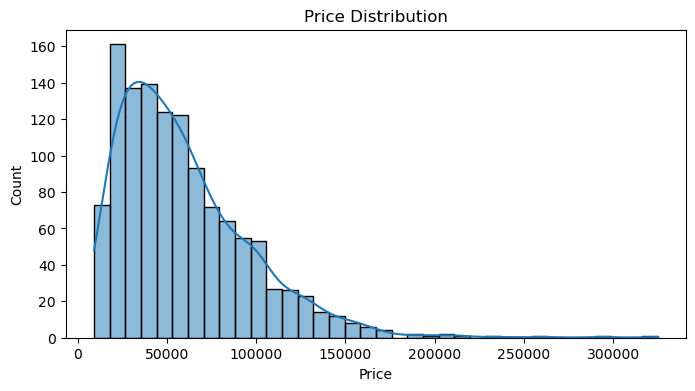

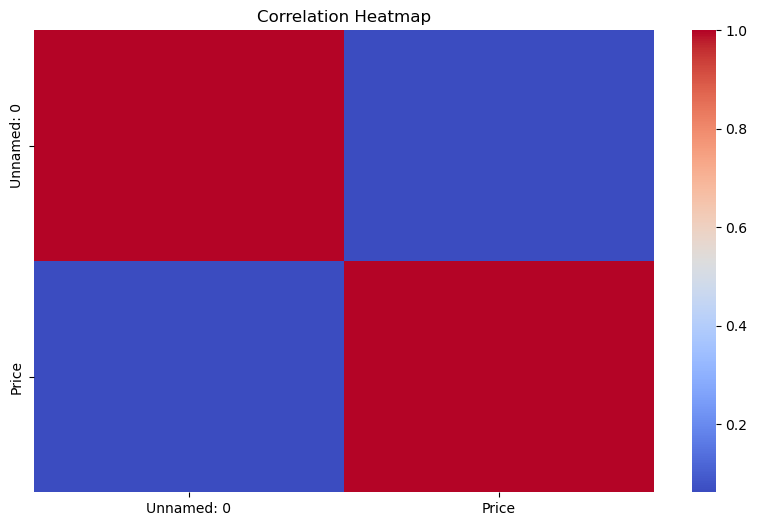


Categorical Columns: ['Company', 'TypeName', 'Inches', 'ScreenResolution', 'Cpu', 'Ram', 'Memory', 'Gpu', 'OpSys', 'Weight']
Numeric Columns: ['Unnamed: 0']

Train Shape: (1042, 11)
Test Shape: (261, 11)


ValueError: Input y contains NaN.

In [1]:
# =====================================
# 📊 FULL EDA + TRAIN/TEST SPLIT SCRIPT
# =====================================

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_squared_error

# ---------------------------------------------------------
# 1) Load Dataset
# ---------------------------------------------------------
df = pd.read_csv("laptopData.csv")

print("Dataset Shape:", df.shape)
print("\nFirst 5 Rows:")
print(df.head())

# ---------------------------------------------------------
# 2) Basic EDA
# ---------------------------------------------------------

print("\n\n=== Missing Values ===")
print(df.isnull().sum())

print("\n\n=== Data Types ===")
print(df.dtypes)

print("\n\n=== Statistical Summary ===")
print(df.describe(include='all'))

# Target column (auto-detected)
target = "Price"   # Change if needed

# ---------------------------------------------------------
# 3) Visual EDA
# ---------------------------------------------------------

plt.figure(figsize=(8,4))
sns.histplot(df[target], kde=True)
plt.title("Price Distribution")
plt.show()

# Numeric Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(numeric_only=True), annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

# ---------------------------------------------------------
# 4) TRAIN & TEST SPLIT
# ---------------------------------------------------------

X = df.drop(columns=[target])
y = df[target]

# Identify categorical & numeric columns
cat_cols = X.select_dtypes(include=['object', 'category']).columns
num_cols = X.select_dtypes(include=['int64', 'float64']).columns

print("\nCategorical Columns:", list(cat_cols))
print("Numeric Columns:", list(num_cols))

# ---------------------------------------------------------
# 5) Preprocessing Pipeline
# ---------------------------------------------------------

numeric_transform = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median"))
])

categorical_transform = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("encoder", OneHotEncoder(handle_unknown='ignore'))
])

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transform, num_cols),
        ("cat", categorical_transform, cat_cols)
    ]
)

# ---------------------------------------------------------
# 6) Training + Test Split
# ---------------------------------------------------------

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

print("\nTrain Shape:", X_train.shape)
print("Test Shape:", X_test.shape)

# ---------------------------------------------------------
# 7) Build Model Pipeline
# ---------------------------------------------------------

model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("rf", RandomForestRegressor(n_estimators=300, random_state=42))
])

# ---------------------------------------------------------
# 8) Train Model
# ---------------------------------------------------------

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# ---------------------------------------------------------
# 9) Evaluation
# ---------------------------------------------------------

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("\n=============================")
print("📌 Model Evaluation Results")
print("=============================")
print(f"R² Score:  {r2:.4f}")
print(f"RMSE:      {rmse:.2f}")
